In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns


In [30]:
# Load the dataset
df = pd.read_csv("data/clean_tweets_v2.csv")

# Filter out rows where 'airline_sentiment_confidence' is equal to 1
df = df[df['airline_sentiment_confidence'] == 1].reset_index()
df.shape

# Text data
X_text = df['clean_tweets']

# Target variable
y = df['airline_sentiment']

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.1, random_state=42)

#vectorizer = CountVectorizer(max_features=4425)
vectorizer = TfidfVectorizer(max_features=4425)

X_train_text = vectorizer.fit_transform(X_train.apply(lambda X_train_text: np.str_(X_train_text)))
X_test_text = vectorizer.transform(X_test.apply(lambda X_test_text: np.str_(X_test_text)))

In [38]:
# Initialize and train the SVM model
svm_classifier = SVC(kernel='rbf', C=10, gamma=1)
svm_classifier.fit(X_train_text, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_text)


              precision    recall  f1-score   support

    negative       0.89      0.97      0.93       755
     neutral       0.81      0.49      0.61       146
    positive       0.88      0.78      0.83       144

    accuracy                           0.88      1045
   macro avg       0.86      0.75      0.79      1045
weighted avg       0.88      0.88      0.87      1045

SVM Model Accuracy: 0.8803827751196173


<Axes: title={'center': 'Sentiment Confusion Matrix'}, xlabel='Predicted Sentiment', ylabel='Actual Sentiment'>

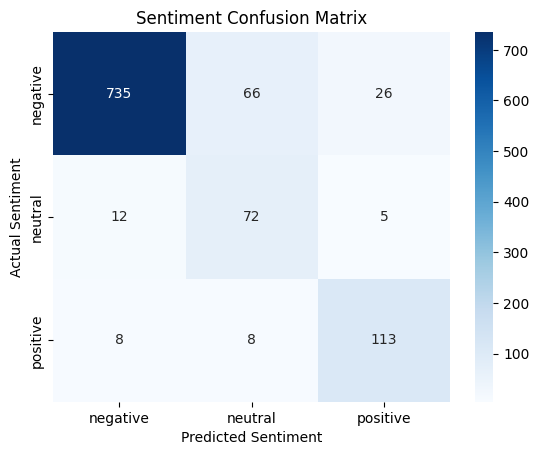

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print(f"SVM Model Accuracy: {accuracy}")

# Create heatmap/confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)
conf_matrix

map = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')

map.set_title('Sentiment Confusion Matrix');
map.set_xlabel('Predicted Sentiment')
map.set_ylabel('Actual Sentiment');

map.xaxis.set_ticklabels(['negative', 'neutral', 'positive'])
map.yaxis.set_ticklabels(['negative', 'neutral', 'positive'])

map

In [ ]:
# IMPLEMENT GRIDSEARCH & FOR LOOP TO FIND BEST PARAMETER COMBINATION
# TOOK A OVER 1 DAY TO RUN; RUN AT YOUR OWN RISK...
# 
# PARAM OUTPUT FROM INITIAL RUN
# PLUGGED IN TO MODEL ABOVE
# 
# max_features: 4425 
# best params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
# max k-fold accuracy 0.8622340425531915

accuracies = []
params = []

for i in range(3000, 5100, 25):
    # Vectorize the text data
    vectorizer = TfidfVectorizer(max_features=i)
    # vectorizer = CountVectorizer(max_features=i)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.1, random_state=42)
   
    X_train_text = vectorizer.fit_transform(X_train.apply(lambda X_train_text: np.str_(X_train_text)))
    X_test_text = vectorizer.transform(X_test.apply(lambda X_test_text: np.str_(X_test_text)))
    
    # Initialize and train the Random Forest model
    svm_classifier = SVC(random_state=42)

    param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.1, 1, 'scale'],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel type
    }

    # Perform Grid Search with Random Forest
    grid_search = GridSearchCV(svm_classifier, param_grid, cv=10, scoring="accuracy")
    grid_search.fit(X_train_text, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
        
    accuracies.append(best_score)
    params.append(best_params)


In [37]:
max_index = accuracies.index(max(accuracies))
num_features = (max_index+120)*25
print('best params: {}'.format(params[max_index]))
print('max_features {}'.format(num_features))
print('max k-fold accuracy {}'.format(accuracies[max_index]))

best params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
max_features 4425
max k-fold accuracy 0.8622340425531915
